In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras import datasets,layers,models

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
(x_train,y_train),(x_test,y_test)= datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

In [8]:
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [9]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [11]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [12]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
y_test=y_test.reshape(-1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

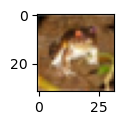

In [14]:
plt.figure(figsize=(5,1))
plt.imshow(x_train[0])

In [15]:
y_train[150]

3

In [16]:
classes= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [17]:
def plot_sample(x,y,index):
    plt.figure(figsize=(10,1))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

In [18]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [19]:
y_train[0]

6

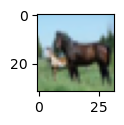

In [20]:
plt.figure(figsize=(10,1))
plt.imshow(x_train[12])

In [21]:
y_train[12]

7

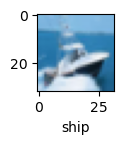

In [22]:
plot_sample(x_train, y_train, 8)

In [23]:
y_train[8]

8

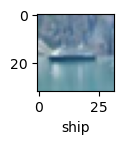

In [24]:
plot_sample(x_train, y_train, 456)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

# Normalizing the training data

In [25]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [26]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [27]:
ann = models.Sequential([
        #input_shape=3072
        layers.Flatten(input_shape=(32,32,3)),
    
        #input layer
        #hidden layer1 nodes 30
        layers.Dense(30, activation='sigmoid'),
    
        #hidden layer 1
        #hidden layer2 nodes 15
        layers.Dense(15, activation='relu'),
    
        #10 indicates no. of outcomes (classes 0-9)
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)  

Epoch 1/5
1563/1563 [==============================] - 10s 5ms/step - loss: 1.9953 - accuracy: 0.2651
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8104 - accuracy: 0.3489
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7559 - accuracy: 0.3698
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7216 - accuracy: 0.3829
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6970 - accuracy: 0.3929


In [28]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 2s 3ms/step - loss: 1.6907 - accuracy: 0.3914


[1.6907203197479248, 0.391400009393692]

In [29]:
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
from sklearn.metrics import classification_report
import numpy as np
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.36      0.41      1000
           1       0.51      0.45      0.48      1000
           2       0.30      0.12      0.17      1000
           3       0.26      0.23      0.25      1000
           4       0.38      0.27      0.32      1000
           5       0.35      0.32      0.33      1000
           6       0.32      0.68      0.43      1000
           7       0.48      0.38      0.43      1000
           8       0.44      0.60      0.51      1000
           9       0.42      0.50      0.46      1000

    accuracy                           0.39     10000
   macro avg       0.40      0.39      0.38     10000
weighted avg       0.40      0.39      0.38     10000



Now let us build a convolutional neural network to train our images

In [30]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(200,activation='sigmoid'),
    layers.Dense(100,activation='sigmoid'),
    layers.Dense(10,activation='sigmoid')
])

In [31]:
 cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
x_train.shape

(50000, 32, 32, 3)

In [33]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 39ms/step - loss: 1.5667 - accuracy: 0.4260
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.2206 - accuracy: 0.5638
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0531 - accuracy: 0.6265
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9376 - accuracy: 0.6708
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8414 - accuracy: 0.7069
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7534 - accuracy: 0.7374
Epoch 7/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.6767 - accuracy: 0.7646
Epoch 8/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6022 - accuracy: 0.7914
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5287 - accuracy: 0.8187
Epoch 10/10
1563/1563 [==============================] - 55s 35m

With CNN, at the end 5 epochs, accuracy was at around 85% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [34]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.0032 - accuracy: 0.6790


[1.0031530857086182, 0.6790000200271606]

In [35]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 5s 16ms/step


array([[2.3020597e-02, 4.1978247e-02, 2.9657045e-02, 9.7747713e-01,
        3.7992878e-03, 9.7937220e-01, 1.5976390e-01, 4.4012954e-03,
        1.3946545e-01, 2.5302362e-02],
       [7.1176815e-01, 9.9486518e-01, 3.2486829e-03, 8.2135182e-03,
        1.7015712e-03, 2.6150867e-03, 1.9775745e-03, 5.0243237e-03,
        9.9873191e-01, 7.6029801e-01],
       [8.2981610e-01, 5.1447707e-01, 1.2981765e-02, 2.5275575e-02,
        3.7229466e-03, 1.6042901e-02, 1.1671399e-03, 1.7895410e-02,
        9.9620289e-01, 7.7675742e-01],
       [9.8702621e-01, 1.4788930e-01, 3.1726116e-01, 7.5765789e-02,
        1.2521130e-01, 6.6589504e-03, 2.5527147e-03, 6.0598361e-03,
        5.7128328e-01, 8.9615919e-02],
       [4.2074363e-04, 1.0401205e-02, 7.8743762e-01, 9.3359458e-01,
        9.8094803e-01, 4.6142200e-01, 8.9677894e-01, 1.9374479e-03,
        1.9875245e-02, 2.3673051e-04]], dtype=float32)

In [36]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 4]

In [37]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

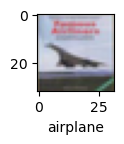

In [38]:
 plot_sample(x_test, y_test,3)

In [39]:
from sklearn.metrics import  classification_report
import numpy as np
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      1000
           1       0.79      0.81      0.80      1000
           2       0.66      0.43      0.52      1000
           3       0.47      0.52      0.50      1000
           4       0.60      0.64      0.62      1000
           5       0.58      0.56      0.57      1000
           6       0.80      0.73      0.76      1000
           7       0.72      0.75      0.74      1000
           8       0.78      0.78      0.78      1000
           9       0.68      0.82      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

